In [1]:
import matplotlib.pyplot as plt
import xarray as xr

%matplotlib inline 
plt.rcParams['figure.figsize'] = [16, 3]

import sys
sys.path.append('/Users/kai/src/psc/python')
import psc

In [2]:
#xr.backends.plugins.guess_engine("/Users/kai/src/psc/build-mac/pfd.000000000.bp")
ds = xr.open_dataset("/Users/kai/src/psc/build-mac/pfd.000000100.bp", length=(1., 8., 24.), engine='pscadios2')
#ds

In [3]:
ds.jy_ec

reading  jeh [0 0 0 1] [  1  80 240   1]


<xarray.DataArray 'jy_ec' (x: 1, y: 80, z: 240)>
array([[[ 0.000000e+00,  0.000000e+00, ...,  0.000000e+00,  0.000000e+00],
        [-2.228614e-05, -1.131441e-05, ...,  0.000000e+00,  0.000000e+00],
        ...,
        [-7.936269e-05, -3.159102e-04, ..., -2.082450e-05,  7.536779e-05],
        [ 0.000000e+00,  0.000000e+00, ..., -6.123533e-05,  0.000000e+00]]],
      dtype=float32)
Coordinates:
  * x        (x) float64 -0.5
  * y        (y) float64 -4.0 -3.9 -3.8 -3.7 -3.6 -3.5 ... 3.5 3.6 3.7 3.8 3.9
  * z        (z) float64 -12.0 -11.9 -11.8 -11.7 -11.6 ... 11.6 11.7 11.8 11.9

reading  jeh [  0   0 120   2] [  1  80 120   1]


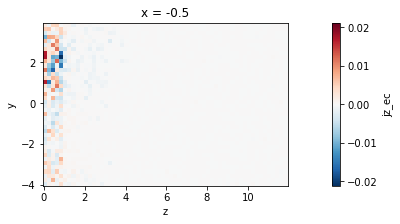

In [4]:
ds.jz_ec.sel(z=slice(0, 12)).coarsen(y=2, z=2).mean().plot()
plt.gca().set_aspect('equal')

In [5]:
ds = xr.open_dataset("/Users/kai/src/psc/build-mac/pfd_moments.000000100.bp", length=(1., 8., 24.), engine='pscadios2')


In [6]:
n_e = -ds.rho_e

reading  all_1st [ 0  0  0 13] [  1  80 240   1]


In [7]:
n_e

<xarray.DataArray 'rho_e' (x: 1, y: 80, z: 240)>
array([[[ 3.6453370e-03,  4.4019935e-03,  4.6093338e-03, ...,
          6.8794400e-04,  7.6568977e-05,  8.0941414e-04],
        [ 6.6826688e-03,  6.1127655e-03,  5.0571060e-04, ...,
         -0.0000000e+00, -0.0000000e+00,  1.0075541e-03],
        [ 6.2559638e-04,  2.6147719e-03, -0.0000000e+00, ...,
          1.9634825e-03, -0.0000000e+00, -0.0000000e+00],
        ...,
        [ 2.9547482e-03,  5.5541209e-04, -0.0000000e+00, ...,
          7.8741426e-04,  1.2760821e-03,  2.4776466e-03],
        [ 5.4629534e-03,  1.0268862e-03, -0.0000000e+00, ...,
          2.8412570e-03,  5.5738739e-03,  8.7480936e-03],
        [-0.0000000e+00, -0.0000000e+00, -0.0000000e+00, ...,
          8.9643858e-03,  2.1805868e-03,  9.4337307e-04]]], dtype=float32)
Coordinates:
  * x        (x) float64 -0.5
  * y        (y) float64 -4.0 -3.9 -3.8 -3.7 -3.6 -3.5 ... 3.5 3.6 3.7 3.8 3.9
  * z        (z) float64 -12.0 -11.9 -11.8 -11.7 -11.6 ... 11.6 11.7 11.8 11.9

In [14]:
ds['n_e'] = -ds.rho_e